# Неделя 1. Вторник 

## Математика

In [65]:
# Имортируй библиотеки
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100
import numpy as np

### Анализ

❓Что значит, что производная в точке равна нулю? 

Точка экстремума - минимум(максимум), функция переходит с убывания(возрастания) на возрастание(убывание)

Найдите производную функций ниже

1. $y = \dfrac{3x^7}{7}$

$y' = 3 \cdot x^6$

2. $y = -7$

$y' = 0$

3. $y = \dfrac{9}{x}$

$y' = -\dfrac{9}{x^2}$

4. $y = 11 - 6x$

$y' = -6$

5. $y = 8\sqrt{x} + 7\sin{x}$

$y' = \dfrac{4}{\sqrt{x}} + 7 \cdot cosx$

6. $y = \dfrac{\sin{x}}{5x}$

$y' = \dfrac{5x\cdot cosx - 5sinx}{25x^2}$

7. $y = \dfrac{\cot{x} + 2}{3x}$

$y' = \dfrac{-\dfrac{3x}{sin^2x} - 3(cotx + 2)}{9x^2}$

8. $y = (3-7x)^9$

$y' = -63\cdot(3-7x)^8$

9. Найдите производную в точке $t = 3$:

$y(t) = t^6 - 4t^3$

1350

<img src="https://icons.iconarchive.com/icons/icons8/windows-8/256/Programming-Github-icon.png" width=32 /> Пора сохранить изменения для __github__. 

1. Перейди в командной строке в папку, в которой расположен этот нотбук. 
2. Выполни команду `git add .`
3. Выполни команду `git commit -m "calculus tasks in progress"`
4. Выполни команду `git push`

### Градиентный спуск

#### Градиентный спуск функции одного переменного

1. Задай функцию `loss`: она будет возвращать значение функции в точке. Для начала можно использовать простую функцию, например: 
$$f(x) = x^2 + 3$$

In [66]:
def loss(x):
    loss = x ** 2 + 3
    return loss

2. Задай функцию `derivative` - она будет возвращать значение производной функции `loss` в точке. 

In [67]:
def derivative(x):
    deriv = 2 * x
    return deriv

3. Задай функцию `step` - она будет возвращать новое значение параметра по формуле:
$$x_{i+1} = x_i - \alpha \frac{\partial f(x)}{\partial x_i}$$

Входные аргументы: `x` - текущее значение параметра, `alpha` – скорость спуска. 

In [68]:
def step(x, alpha):
    '''
    input:
        alpha - learning rate
    
    returns: 
        coord - x_coord
        f     - y_coord
    '''
    coord = x - alpha * derivative(x)
    loss_value = loss(coord)
    return coord, loss_value

4. Задай функцию `get_minima`, которая будет возвращать список, содержащий все значения параметра `x`, и список `loss_values`, который будет содержать значения функции `loss` для соответствующего параметра `x`. На вход функции поступает `x_0` – начальное значение параметра, `eps` – критерий останова. `alpha` - скорость спуска, которая будет передаваться в функцию `step`

In [69]:
def get_minima(x_0, eps, alpha): 
    x_current = x_0
    loss_current = loss(x_0)
    
    x = []
    loss_values = []
    
    x.append(x_current)
    loss_values.append(loss_current)
    
    while True:
        x_new, loss_new = step(x_current, alpha)
        if abs(loss_new - loss_current) < eps:
            print('x координата - ', x_current)
            print('Наименьшее значение функции - ', loss_current)
            break
        else:
            x.append(x_new)
            loss_values.append(loss_new)
            x_current, loss_current = x_new, loss_new
    return np.array(x), np.array(loss_values)

In [70]:
alpha = 0.1
eps = 0.0001

In [71]:
x_vals, loss_vals = get_minima(2, eps, alpha)

x координата -  0.014757395258967642
Наименьшее значение функции -  3.0002177807148294


Нарисуй график функции `loss`. По координатам, возвращенным функцией `get_minima` нарисуй график движения градиентного спуска. 

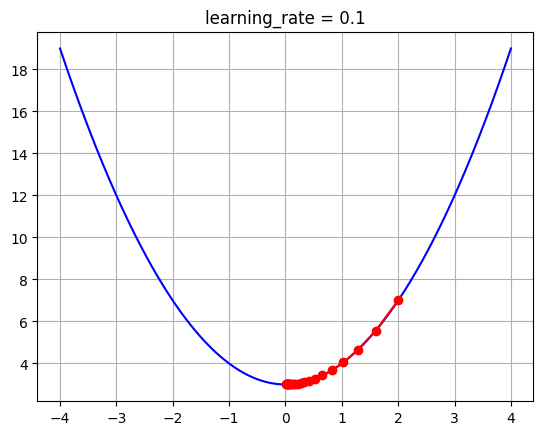

In [72]:
x = np.linspace(-4, 4, 1000)


plt.plot(x, loss(x), color='blue')
plt.plot(x_vals, loss_vals, color='red', marker='o')
plt.title(f"learning_rate = {alpha}")
plt.grid();

Нарисуй несколько графиков, соответствующих разным коэффициентам $\alpha$. 

In [73]:
# code

❓ Как выбрать оптимальную скорость обучения?

> _ответ тут_

❓Будет ли зависеть скорость работы всей процедуры от начального выбора значения искомого параметра?

> ответ тут

Поэкспериментируй с результатом, задай функцию: 
$$f(x) = x^2 - x$$

In [74]:
def loss(x):
    loss = x ** 2 - x
    return loss

def derivative(x):
    deriv = 2 * x - 1
    return deriv

#get_minima(2, 0.0001, 0.1)

#### Градиентный спуск для функции двух переменных

1. Модифицируй функции из предыдущего задания и реализуй поиск минимума функции двух переменных. 
Функция для минимизации: 
$$\mathcal{L} = x_1^2 + 2x_2^2 - 3x_1 - 4x_2$$

В конце визуализируй результат аналогично предыдущему заданию.

$(\frac{3}{2};1)$

In [3]:
import numpy as np

In [4]:
def loss(x):
    x = np.array(x)
    
    loss = x[0] ** 2 + 2 * x[1] ** 2 - 3 * x[0] - 4 * x[1]
    
    return loss

In [17]:
loss([1.5, 1])

-4.25

In [9]:
def grad(x):
    grad = np.array([2 * x[0] - 3, 4 * x[1] - 4])
    return grad

In [10]:
derivative([2, 2])

array([1, 4])

In [11]:
def step(x, alpha):
    '''
    input:
        alpha - learning rate
    
    returns: 
        coord - [x1_coords, x2_coords]
        f - y_coord
    '''
    coord = x - alpha * grad(x)
    loss_value = loss(coord)
    
    return coord, loss_value

In [14]:
step([-4, 2], 0.1)

(array([-2.9,  1.6]), 15.83)

In [67]:
def get_minima(x_0, eps, alpha): 
    x = [x_0]
    loss_values = [loss(x_0)]
    
    
    x_current = x_0
    loss_current = loss(x_current)
    
    while True:
        x_new, loss_new = step(x_current, alpha)
        
        x.append(x_new)
        loss_values.append(loss_new)
        
        if np.abs(loss_new - loss_current) < eps:
            break
            
        x_current = x_new
        loss_current = loss_new
    
    x = np.array(x)
    return x, loss_values

In [68]:
x, loss_values = get_minima([40,40], 0.00001, 0.1)

$$\mathcal{L} = x_1^2 + 2x_2^2 - 3x_1 - 4x_2$$

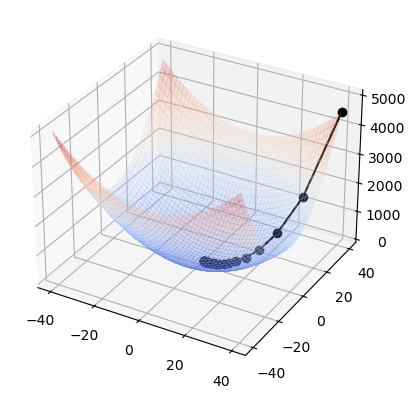

In [72]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
# X = x[:, 0]
# Y = x[:, 1]

X = np.arange(-40, 40, 0.2)
Y = np.arange(-40, 40, 0.2)
X, Y = np.meshgrid(X, Y)

Z = X ** 2 + 2 * Y ** 2 - 3 * X - 4 * Y

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, alpha=0.2)


ax.plot(x[:, 0], x[:, 1], loss_values, color='k', marker='o')


plt.show()

2. С помощью градиентного _спуска_ найти __максимум__ функции и визуализировать результат: 
$$f(w_1, w_2) = \dfrac{1}{1+w_1^2} + \dfrac{1}{1+w_2^2}$$

In [80]:
def loss(x):
    loss = (1 / (1 + x[0] ** 2)) + (1 / (1 + x[1] ** 2)) 
    return loss

In [81]:
def derivative(x):
    deriv = np.array([- (2 * x[0]) / (1 + x[0] ** 2) ** 2, - (2 * x[1]) / (1 + x[1] ** 2) ** 2])
    return deriv

In [82]:
def step(x, alpha):
    '''
    input:
        alpha - learning rate
    
    returns: 
        coord - [x1_coords, x2_coords]
        f - y_coord
    '''
    coord = np.array(x) + alpha * derivative(x)
    loss_value = loss(coord)
    return coord, loss_value

In [83]:
def get_minima(x_0, eps, alpha): 
    x_current = np.array(x_0)
    loss_current = np.array(loss(x_0))
    
    x = []
    loss_values = []
    
    x.append(x_current)
    loss_values.append(loss_current)
    
    while True:
        x_new, loss_new = step(x_current, alpha)
        if abs(loss_new - loss_current) < eps:
            print('x координата - ', x_current)
            print('Наибольшее значение функции - ', loss_current)
            break
        else:
            x.append(x_new)
            loss_values.append(loss_new)
            x_current, loss_current = x_new, loss_new
    return x, loss_values

In [85]:
#get_minima([5,5], 0.00001, 0.1)

3. С помощью градиентного спуска найти минимум функции и визуализировать результат: 
$$f(x, y) = (5x)^2 + y^2$$

In [60]:
def loss(x):
    loss = 25 * x[0] ** 2 + x[1] ** 2
    return loss

def derivative(x):
    deriv = np.array([50 * x[0], 2 * x[1]])
    return deriv

def step(x, alpha):
    '''
    input:
        alpha - learning rate
    
    returns: 
        coord - [x1_coords, x2_coords]
        f - y_coord
    '''
    coord = np.array(x) - alpha * derivative(x)
    loss_value = loss(coord)
    return coord, loss_value

def get_minima(x_0, eps, alpha): 
    x_current = np.array(x_0)
    loss_current = np.array(loss(x_0))
    
    x = []
    loss_values = []
    
    x.append(x_current)
    loss_values.append(loss_current)
    
    while True:
        x_new, loss_new = step(x_current, alpha)
        #print(x_new, loss_new)
        if abs(loss_new - loss_current) < eps:
            print('x координата - ', x_current)
            print('Наименьшее значение функции - ', loss_current)
            break
        else:
            x.append(x_new)
            loss_values.append(loss_new)
            x_current, loss_current = x_new, loss_new
    return x, loss_values

#get_minima([5,5], 0.000001, 0.01)

<img src="https://icons.iconarchive.com/icons/icons8/windows-8/256/Programming-Github-icon.png" width=32 /> Пора сохранить изменения для __github__. 

1. Перейди в командной строке в папку, в которой расположен этот нотбук. 
2. Выполни команду `git add .`
3. Выполни команду `git commit -m "calculus tasks stage 2"`
4. Выполни команду `git push`

#### Адаптивная скорость обучения

Модифицируй одну из предыдущих реализаций, добавив [адаптивный подбор скорости обучения](https://en.wikipedia.org/wiki/Learning_rate) (time-based, step-based, exponential)

$ \displaystyle \eta _ {n + 1} = {\frac {\eta _ {n}} {1 + d_n}}$

In [51]:
def loss(x):
    loss = x ** 2 + 3
    return loss

def derivative(x):
    deriv = 2 * x
    return deriv

def step(x, alpha, dn):
    '''
    input:
        alpha - learning rate
    
    returns: 
        coord - x_coord
        f     - y_coord
    '''
    coord = x - (alpha/(1 + dn)) * derivative(x)
    loss_value = loss(coord)
    return coord, loss_value

def get_minima(x_0, eps, alpha, dn): 
    x_current = x_0
    loss_current = loss(x_0)
    
    x = []
    loss_values = []
    
    x.append(x_current)
    loss_values.append(loss_current)
    i = 0 
    
    while True:
        x_new, loss_new = step(x_current, alpha, dn * i)
        if abs(loss_new - loss_current) < eps:
            print('x координата - ', x_current)
            print('Наименьшее значение функции - ', loss_current)
            break
        else:
            x.append(x_new)
            loss_values.append(loss_new)
            x_current, loss_current = x_new, loss_new
        i += 1
    return np.array(x), np.array(loss_values)

In [63]:
alpha = 0.1
eps = 0.0000001
dn = 0.5

x_vals, loss_vals = get_minima(4, eps, alpha, dn)

x координата -  0.06723910628992527
Наименьшее значение функции -  3.004521097414668


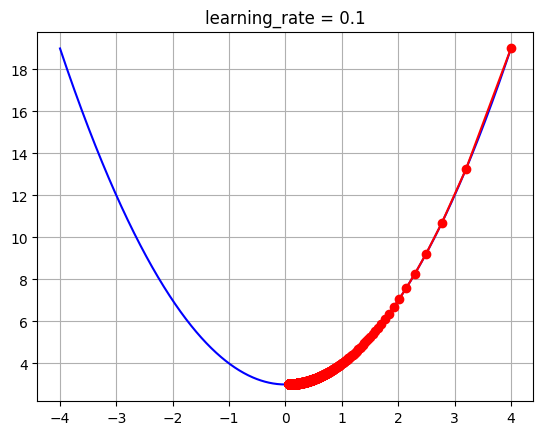

In [64]:
x = np.linspace(-4, 4, 1000)


plt.plot(x, loss(x), color='blue')
plt.plot(x_vals, loss_vals, color='red', marker='o')
plt.title(f"learning_rate = {alpha}")
plt.grid();

#### Решение системы линейных уравнений с помощью градиентного спуска


Реализуй класс `Solver` для вычисления решения системы линейных уравнений произвольного размера.  

Логика работы класса должна быть следующей: 

```python

solver = Solver(X, y)
solver.fit(learning_rate=0.01, n_iter=10)
print(solver.mse())
>>> Mean squared error: 0.00313
print(solver.coef_)
>>> [.5, 1, -2]

```

`X` – матрица системы

`y` – вектор ответов

`learning_rate` – шаг градинтного спуска

`n_iter` - число итераций. 

Метод `mse` вычисляет среднеквадратическую ошибку: `sum((y - X@w)**2) / len(w)`, где `w` - искомый вектор коэффициентов. 

Попробуй решить с помощью реализованного класса систему уравнений:
$$
\begin{cases}
2w_1 + 3w_2 - w_3 = 9 \\
w_1 -2w_2 + w_3 = 3 \\
w_1 + 2w_3 = 2
\end{cases}
$$

Решение уравнения выше – 4, 0, -1. Значения, которые ты получишь в процессе оптимизации могут незначительно отличаться. 


In [150]:
X = np.array([
    [2, 3, -1], 
    [1, -2, 1],
    [1, 0, 2]
])

y = np.array([9, 3, 2])

In [154]:
# code

In [152]:
solver = Solver(X, y)
solver.fit(0.1, 100)
solver.mse()

#### Реализация класса оптимизатора

Реализуй класс, который `Optimizer`, который будет решать задачу минимизации функции, сохранения истории процедуры, визуализации и возможностью выбирать один из типов управления скоростью обучения. Добавь возможность задания параметра для реализации остановки. 

In [8]:
class Optimizer():
    pass

<img src="https://icons.iconarchive.com/icons/icons8/windows-8/256/Programming-Github-icon.png" width=32 /> Сохрани файл для __github__. 

1. Перейди в командной строке в папку, в которой расположен этот нотбук. 
2. Выполни команду `git add .`
3. Выполни команду `git commit -m "calculus tasks completed"`
4. Выполни команду `git push`